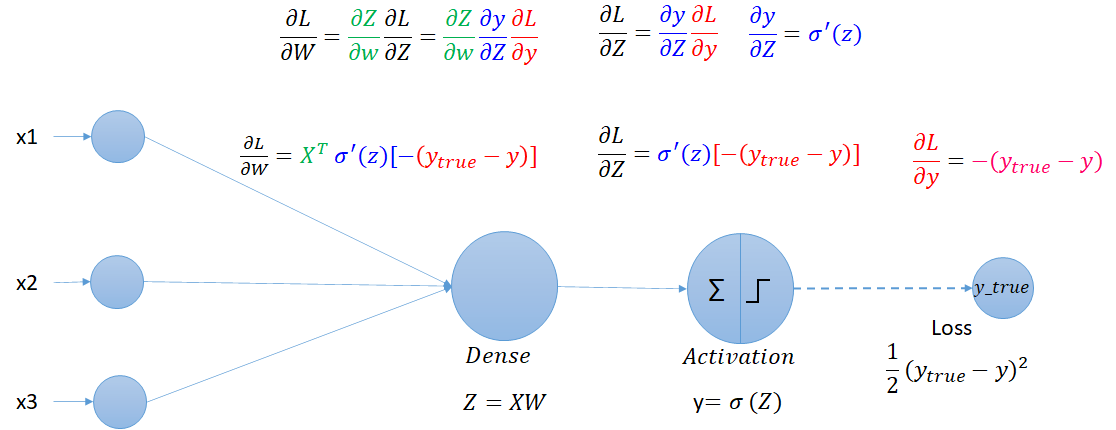

In [ ]:
# loss
class Loss:
	def forward(self, y_pred, y_true):
		self.output = np.subtract(y_true , y_pred)
		self.cost = 1/2*(self.output)*(self.output)
	def backward(self):
		self.dinputs = -1*self.output # (y_pred - y_true)

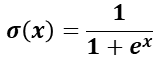

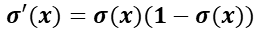

In [5]:
# activation function
class Activation_Sigmoid:
	def forward(self, inputs):
		self.inputs = inputs
		self.output = 1/(1+np.exp(-1*inputs))
	def backward(self, dvalues):
		sigmoid = self.output
		d_sigmoid = (sigmoid)*(1-sigmoid)
		self.dinputs = np.multiply(dvalues, d_sigmoid)

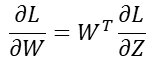

In [ ]:
class Dense_Layer:
	def __init__(self, n_inputs, n_neurons):
		self.biases = np.zeros((1, n_neurons))
		self.weights = np.random.random((n_inputs, n_neurons))
	def forward(self, inputs):
		self.inputs = inputs
		self.output = (np.dot(inputs, self.weights) + self.biases)
	def backward(self, dvalues):
		self.dweights = np.dot(self.inputs.T, dvalues)


**Training**

In [6]:
layer1 = Dense_Layer(3, 1)
activation1 = Activation_Sigmoid()
loss = Loss()

# update and optimizer
for i in range(1000):
    layer1.forward(inputs)
    activation1.forward(layer1.output)
    loss.forward(activation1.output, y_true)
   
    if(i%100==0):
        print(f'[{i}] cost\n{loss.cost}\n')

    loss.backward()
    activation1.backward(loss.dinputs)
    layer1.backward(activation1.dinputs)
    layer1.weights -= layer1.dweights

print(f'New synaptic weights after training:\n{layer1.weights}\n')


print('Considering new situation:\n{[0,1,1]}\n')
newZ = np.dot(np.array([0,1,1]), layer1.weights)
activationOutput = 1/(1+np.exp(-newZ))
print(activationOutput)




[0] cost
[[0.08104069]
 [0.14398226]
 [0.0676589 ]
 [0.16531976]]

[100] cost
[[0.0005654 ]
 [0.01452912]
 [0.01048542]
 [0.01584016]]

[200] cost
[[0.00010809]
 [0.00691956]
 [0.00506614]
 [0.00713025]]

[300] cost
[[4.08777819e-05]
 [4.42714733e-03]
 [3.26026817e-03]
 [4.50077428e-03]]

[400] cost
[[2.06724842e-05]
 [3.22342139e-03]
 [2.38141637e-03]
 [3.25897119e-03]]

[500] cost
[[1.22577757e-05]
 [2.52210378e-03]
 [1.86711606e-03]
 [2.54254177e-03]]

[600] cost
[[8.03207458e-06]
 [2.06561246e-03]
 [1.53138028e-03]
 [2.07870891e-03]]

[700] cost
[[5.63560227e-06]
 [1.74590583e-03]
 [1.29575502e-03]
 [1.75493949e-03]]

[800] cost
[[4.15539737e-06]
 [1.51004846e-03]
 [1.12165244e-03]
 [1.51661994e-03]]

[900] cost
[[3.18147211e-06]
 [1.32916241e-03]
 [9.87961756e-04]
 [1.33413842e-03]]

New synaptic weights after training:
[[-2.9702737 ]
 [-2.97199358]
 [ 9.06933162]]

Considering new situation:
{[0,1,1]}

[0.9977562]
